Learning EM steps: 

Code owner https://github.com/krosaen (Thanks!)

Referance: http://karlrosaen.com/ml/notebooks/em-coin-flips/

In [1]:
import numpy as np

def coin_em(rolls, theta_A=None, theta_B=None, maxiter=10):
    # Initial Guess
    theta_A = theta_A or random.random()
    theta_B = theta_B or random.random()
    thetas = [(theta_A, theta_B)]
    # Iterate
    
    for c in range(maxiter):
        print("#%d:\t%0.2f %0.2f" % (c, theta_A, theta_B))
        
        heads_A, tails_A, heads_B, tails_B = e_step(rolls, theta_A, theta_B)
        theta_A, theta_B = m_step(heads_A, tails_A, heads_B, tails_B)
        
    thetas.append((theta_A,theta_B))    
    return thetas, (theta_A,theta_B)

def e_step(rolls, theta_A, theta_B):
    """Produce the expected value for heads_A, tails_A, heads_B, tails_B 
    over the rolls given the coin biases"""
    
    heads_A, tails_A = 0,0
    heads_B, tails_B = 0,0
    for trial in rolls:
        likelihood_A = coin_likelihood(trial, theta_A)
        likelihood_B = coin_likelihood(trial, theta_B)
        p_A = likelihood_A / (likelihood_A + likelihood_B)
        p_B = likelihood_B / (likelihood_A + likelihood_B)
        heads_A += p_A * trial.count("H")
        tails_A += p_A * trial.count("T")
        heads_B += p_B * trial.count("H")
        tails_B += p_B * trial.count("T") 
    return heads_A, tails_A, heads_B, tails_B

def m_step(heads_A, tails_A, heads_B, tails_B):
    """Produce the values for theta that maximize the expected number of heads/tails"""

    # Replace dummy values with your implementation
    theta_A = heads_A / (heads_A + tails_A)
    theta_B = heads_B / (heads_B + tails_B)
    return theta_A, theta_B

def coin_likelihood(roll, bias):
    # P(X | Z, theta)
    numHeads = roll.count("H")
    flips = len(roll)
    return pow(bias, numHeads) * pow(1-bias, flips-numHeads)

In [202]:
rolls = [ "HTTTHHTHTH", "HHHHTHHHHH", "HTHHHHHTHH", 
          "HTHTTTHHTT", "THHHTHHHTH" ]
thetas, _ = coin_em(rolls, 0.5, 0.5, maxiter=10)
np.array(thetas)

#0:	0.50 0.50
#1:	0.66 0.66
#2:	0.66 0.66
#3:	0.66 0.66
#4:	0.66 0.66
#5:	0.66 0.66
#6:	0.66 0.66
#7:	0.66 0.66
#8:	0.66 0.66
#9:	0.66 0.66


array([[0.5 , 0.5 ],
       [0.66, 0.66]])

In [198]:
from matplotlib import pyplot as plt
import matplotlib as mpl


def plot_coin_likelihood(rolls, thetas=None):
    # grid
    xvals = np.linspace(0.01,0.99,100)
    yvals = np.linspace(0.01,0.99,100)
    X,Y = np.meshgrid(xvals, yvals)
    
    # compute likelihood
    Z = []
    for i,r in enumerate(X):
        z = []
        for j,c in enumerate(r):
            z.append(coin_marginal_likelihood(rolls,c,Y[i][j]))
        Z.append(z)
        
    #print(Z[1][1])
    
    # plot
    plt.figure(figsize=(10,8))
    C = plt.contour(X,Y,Z,150)
    #cbar = plt.colorbar(C)
    plt.title(r"Likelihood ($\log p(\mathcal{X}|\theta_A,\theta_B)$)", fontsize=15)
    plt.xlabel(r"$\theta_A$", fontsize=20)
    plt.ylabel(r"$\theta_B$", fontsize=20)
    
    # plot thetas
    if thetas is not None:
        thetas = np.array(thetas)
        plt.plot(thetas[:,0], thetas[:,1], '-k', lw=2.0)
        plt.plot(thetas[:,0], thetas[:,1], 'ok', ms=5.0)
        

def coin_marginal_likelihood(rolls, biasA, biasB):
    # P(X | theta)
    trials = []
    for roll in rolls:
        h = roll.count("H")
        t = roll.count("T")
        likelihoodA = coin_likelihood(roll, biasA)
        likelihoodB = coin_likelihood(roll, biasB)
        trials.append(np.log(0.5 * (likelihoodA + likelihoodB)))
    return sum(trials)

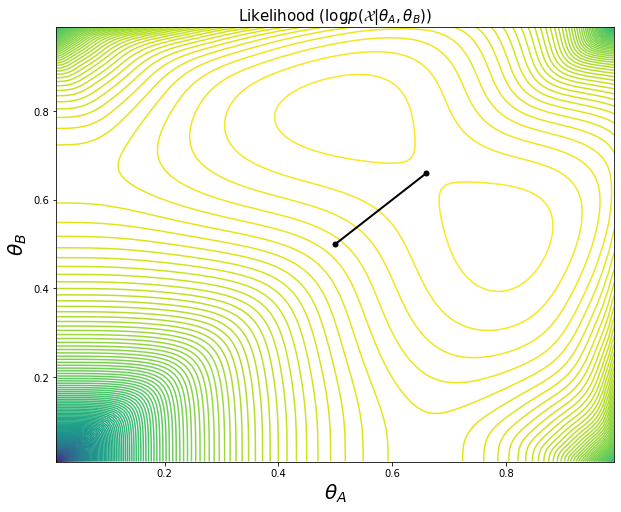

In [199]:
plot_coin_likelihood(rolls, thetas)